# **Tutorial 3: Exploring Sea Ice Area with OceanDataCatalog**

### **Description** 
- Jupyter Notebook demonstrating how to access & explore the eORCA1-ERA5v1 Near-Present-Day monthly mean sea ice area output (1976-2023) stored in Icechunk repositories using the OceanDataCatalog API.


In [1]:
# -- Importing Python libraries -- #
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from OceanDataStore import OceanDataCatalog

### **Processing**

* Create an instance of the OceanDataCatalog class to access the National Oceanography Centre ocean model Spatio-Temporal Access Catalog (noc-model-stac):

In [2]:
catalog = OceanDataCatalog(catalog_name="noc-model-stac")

### **eORCA12: June-July 2023 Antarctic Sea Ice Area Anomaly**

* Let's start by searching the catalog for the sea ice concentration variable `siconc`.

In [3]:
catalog.search(collection='noc-npd', variable='siconc')


            * Item ID: noc-npd/npd-eorca1-era5v1/gn_global/I1y
              Title: eORCA1 ERA5v1 NPD I1y Icechunk repository
              Description: Icechunk repository containing eORCA1 ERA5v1 NPD global sea-ice annual mean outputs defined at T-points.
              Platform: gn_global
              Start Date: 1976-01-01T00:00:00Z
              End Date: 2024-12-31T00:00:00Z
            

            * Item ID: noc-npd/npd-eorca1-era5v1/gn_global/I1m
              Title: eORCA1 ERA5v1 NPD I1m Icechunk repository
              Description: Icechunk repository containing eORCA1 ERA5v1 NPD global sea-ice monthly mean outputs defined at T-points.
              Platform: gn_global
              Start Date: 1976-01-01T00:00:00Z
              End Date: 2024-12-31T00:00:00Z
            

            * Item ID: noc-npd/npd-eorca025-era5v1/gn_global/I1y_3d
              Title: eORCA025 ERA5v1 NPD I1y_3d Icechunk repository
              Description: Icechunk repository containing eORCA025

* Next, let's open the eORCA12 ERA5v1 NPD monthly-mean output for variable `siconc` as an `xarray.Dataset`.

* We will also select only the months of June-July for our analysis.

In [4]:
ds = catalog.open_dataset(id=catalog.Items[-1].id,
                          variables=['siconc'],
                          bbox=[-180, -90, 180, -50],
                          )

ds = ds.sel(time_counter=ds.time_counter.dt.month.isin([6, 7]))
ds

<xarray.Dataset> Size: 2GB
Dimensions:        (time_counter: 96, y: 1347, x: 4320)
Coordinates:
    nav_lon        (y, x) float64 47MB 73.0 73.08 73.17 ... 72.75 72.83 72.92
    nav_lat        (y, x) float64 47MB -84.1 -84.1 -84.1 ... -50.01 -50.01
  * time_counter   (time_counter) datetime64[ns] 768B 1976-06-16 ... 2023-07-...
    time_centered  (time_counter) datetime64[ns] 768B dask.array<chunksize=(1,), meta=np.ndarray>
  * y              (y) int64 11kB 0 1 2 3 4 5 ... 1341 1342 1343 1344 1345 1346
  * x              (x) int64 35kB 0 1 2 3 4 5 ... 4314 4315 4316 4317 4318 4319
Data variables:
    siconc         (time_counter, y, x) float32 2GB dask.array<chunksize=(1, 1347, 4320), meta=np.ndarray>
Attributes:
    name:         OUTPUT/eORCA12_1m_icemod
    description:  ice variables
    title:        ice variables
    Conventions:  CF-1.6
    timeStamp:    2025-Jul-22 16:24:02 GMT
    uuid:         8793057a-14ff-4ac3-b79e-db14def68e1d

* We define `siarea_1991_2020` as the 1991-2020 time-mean June-July global sea ice concentration climatology.

* We calculate the 2023 June-July time-mean global sea ice concentration as `siarea_2023`.

In [5]:
siarea_1991_2020 = ds.sel(time_counter=slice('1991-01', '2020-12'))['siconc'].mean(dim='time_counter')
siarea_2023 = ds.sel(time_counter=slice('2023-01', '2023-12'))['siconc'].mean(dim='time_counter')

* Finally, we use cartopy to plot a map of the 2023 June-July sea ice concentration anomaly (relative to the 1991-2020 June-July climatology).

Text(0.5, 0, 'eORCA12-ERA5v1 SI Concentration')

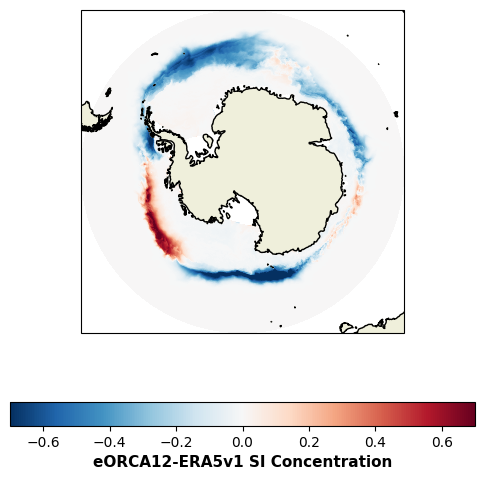

In [6]:
# -- Land & coastline features -- #
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                edgecolor='face',
                                facecolor=cfeature.COLORS['land'])
coast_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                edgecolor='black',
                                facecolor='none')

# -- Figure -- #
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Orthographic(0, -90))
colormesh = plt.pcolormesh((siarea_2023 - siarea_1991_2020).nav_lon, (siarea_2023 - siarea_1991_2020).nav_lat, (siarea_2023 - siarea_1991_2020), transform=ccrs.PlateCarree(), vmin=-0.7, vmax=0.7, cmap='RdBu_r')
# Add features:
ax.add_feature(land_50m)
ax.add_feature(coast_50m)
# Add default attributes:
cbar = plt.colorbar(colormesh, orientation='horizontal', shrink=0.6)
cbar.ax.tick_params(labelsize=10) 
cbar.ax.set_xlabel('eORCA12-ERA5v1 SI Concentration', fontdict={'fontsize': 11, 'fontweight':'bold'})

### **eORCA025: June-July 2023 Antarctic Sea Ice Area Anomaly**

In [7]:
catalog.search(collection='noc-npd', variable='siconc')


            * Item ID: noc-npd/npd-eorca1-era5v1/gn_global/I1y
              Title: eORCA1 ERA5v1 NPD I1y Icechunk repository
              Description: Icechunk repository containing eORCA1 ERA5v1 NPD global sea-ice annual mean outputs defined at T-points.
              Platform: gn_global
              Start Date: 1976-01-01T00:00:00Z
              End Date: 2024-12-31T00:00:00Z
            

            * Item ID: noc-npd/npd-eorca1-era5v1/gn_global/I1m
              Title: eORCA1 ERA5v1 NPD I1m Icechunk repository
              Description: Icechunk repository containing eORCA1 ERA5v1 NPD global sea-ice monthly mean outputs defined at T-points.
              Platform: gn_global
              Start Date: 1976-01-01T00:00:00Z
              End Date: 2024-12-31T00:00:00Z
            

            * Item ID: noc-npd/npd-eorca025-era5v1/gn_global/I1y_3d
              Title: eORCA025 ERA5v1 NPD I1y_3d Icechunk repository
              Description: Icechunk repository containing eORCA025

In [8]:
ds = catalog.open_dataset(id="noc-npd/npd-eorca025-era5v1/gn_global/I1m_3d",
                          variables=['siconc'],
                          bbox=[-180, -90, 180, -50],
                          )

ds = ds.sel(time_counter=ds.time_counter.dt.month.isin([6, 7]))
ds

<xarray.Dataset> Size: 266MB
Dimensions:        (time_counter: 98, y: 453, x: 1440)
Coordinates:
    nav_lon        (y, x) float64 5MB 73.0 73.25 73.5 73.75 ... 72.25 72.5 72.75
    nav_lat        (y, x) float64 5MB -89.5 -89.5 -89.5 ... -50.06 -50.06 -50.06
    time_centered  (time_counter) datetime64[ns] 784B dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 784B 1976-06-16 ... 2024-07-...
Dimensions without coordinates: y, x
Data variables:
    siconc         (time_counter, y, x) float32 256MB dask.array<chunksize=(1, 453, 1440), meta=np.ndarray>

In [9]:
siarea_1991_2020 = ds.sel(time_counter=slice('1991-01', '2020-12'))['siconc'].mean(dim='time_counter')
siarea_2023 = ds.sel(time_counter=slice('2023-01', '2023-12'))['siconc'].mean(dim='time_counter')

Text(0.5, 0, 'eORCA025-ERA5v1 SI Concentration')

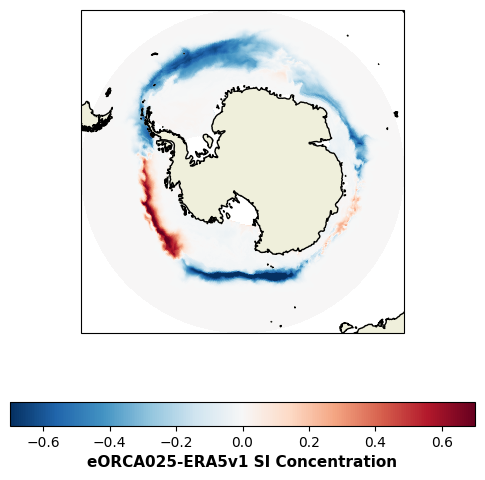

In [10]:
# -- Plot -- #
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Orthographic(0, -90))
colormesh = plt.pcolormesh((siarea_2023 - siarea_1991_2020).nav_lon, (siarea_2023 - siarea_1991_2020).nav_lat, (siarea_2023 - siarea_1991_2020), transform=ccrs.PlateCarree(), vmin=-0.7, vmax=0.7, cmap='RdBu_r')
# Add features:
ax.add_feature(land_50m)
ax.add_feature(coast_50m)
# Add default attributes:
cbar = plt.colorbar(colormesh, orientation='horizontal', shrink=0.6)
cbar.ax.tick_params(labelsize=10) 
cbar.ax.set_xlabel('eORCA025-ERA5v1 SI Concentration', fontdict={'fontsize': 11, 'fontweight':'bold'})

### **eORCA1: June-July 2023 Antarctic Sea Ice Area Anomaly**

In [11]:
catalog.search(collection='noc-npd', variable='siconc')


            * Item ID: noc-npd/npd-eorca1-era5v1/gn_global/I1y
              Title: eORCA1 ERA5v1 NPD I1y Icechunk repository
              Description: Icechunk repository containing eORCA1 ERA5v1 NPD global sea-ice annual mean outputs defined at T-points.
              Platform: gn_global
              Start Date: 1976-01-01T00:00:00Z
              End Date: 2024-12-31T00:00:00Z
            

            * Item ID: noc-npd/npd-eorca1-era5v1/gn_global/I1m
              Title: eORCA1 ERA5v1 NPD I1m Icechunk repository
              Description: Icechunk repository containing eORCA1 ERA5v1 NPD global sea-ice monthly mean outputs defined at T-points.
              Platform: gn_global
              Start Date: 1976-01-01T00:00:00Z
              End Date: 2024-12-31T00:00:00Z
            

            * Item ID: noc-npd/npd-eorca025-era5v1/gn_global/I1y_3d
              Title: eORCA025 ERA5v1 NPD I1y_3d Icechunk repository
              Description: Icechunk repository containing eORCA025

In [12]:
ds = catalog.open_dataset(id="noc-npd/npd-eorca1-era5v1/gn_global/I1m",
                          variables=['siconc'],
                          bbox=[-180, -90, 180, -50],
                          )

ds = ds.sel(time_counter=ds.time_counter.dt.month.isin([6, 7]))
ds

<xarray.Dataset> Size: 17MB
Dimensions:        (time_counter: 98, y: 114, x: 360)
Coordinates:
    nav_lon        (y, x) float64 328kB 73.5 74.5 75.5 76.5 ... 70.5 71.5 72.5
    nav_lat        (y, x) float64 328kB -84.21 -84.21 -84.21 ... -50.06 -50.06
    time_centered  (time_counter) datetime64[ns] 784B dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 784B 1976-06-16 ... 2024-07-...
Dimensions without coordinates: y, x
Data variables:
    siconc         (time_counter, y, x) float32 16MB dask.array<chunksize=(1, 114, 360), meta=np.ndarray>

In [13]:
siarea_1991_2020 = ds.sel(time_counter=slice('1991-01', '2020-12'))['siconc'].mean(dim='time_counter')
siarea_2023 = ds.sel(time_counter=slice('2023-01', '2023-12'))['siconc'].mean(dim='time_counter')

Text(0.5, 0, 'eORCA1-ERA5v1 SI Concentration')

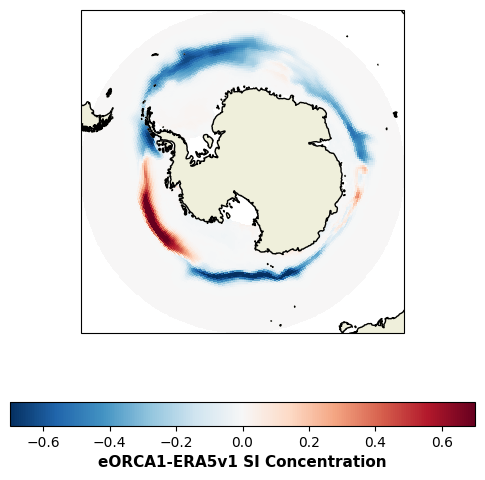

In [14]:
# -- Plot -- #
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Orthographic(0, -90))
colormesh = plt.pcolormesh((siarea_2023 - siarea_1991_2020).nav_lon, (siarea_2023 - siarea_1991_2020).nav_lat, (siarea_2023 - siarea_1991_2020), transform=ccrs.PlateCarree(), vmin=-0.7, vmax=0.7, cmap='RdBu_r')
# Add features:
ax.add_feature(land_50m)
ax.add_feature(coast_50m)
# Add default attributes:
cbar = plt.colorbar(colormesh, orientation='horizontal', shrink=0.6)
cbar.ax.tick_params(labelsize=10) 
cbar.ax.set_xlabel('eORCA1-ERA5v1 SI Concentration', fontdict={'fontsize': 11, 'fontweight':'bold'})